In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [3]:
df1=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv ")
df2=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv ")
df3=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv ")
df4=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv ")
df5=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv ")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94 years 05 months
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66 years 11 months
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60 years 03 months
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62 years 02 months


In [4]:
df.shape

(932372, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932372 entries, 0 to 932371
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                932372 non-null  object 
 1   town                 932372 non-null  object 
 2   flat_type            932372 non-null  object 
 3   block                932372 non-null  object 
 4   street_name          932372 non-null  object 
 5   storey_range         932372 non-null  object 
 6   floor_area_sqm       932372 non-null  float64
 7   flat_model           932372 non-null  object 
 8   lease_commence_date  932372 non-null  int64  
 9   resale_price         932372 non-null  float64
 10  remaining_lease      223322 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.2+ MB


In [6]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

Data Cleaning

In [9]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
df.nunique()

month                   416
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9590
remaining_lease         727
dtype: int64

Remaining Lease

In [12]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [16]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94.416667
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66.916667
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60.250000
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62.166667
932371,2024-08,YISHUN,5 ROOM,860,YISHUN AVE 4,04 TO 06,122.0,Improved,1988,708000.0,63.166667


In [18]:
# fill null values in remaining_lease with mode beacuse null value more than 25%
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0


In [19]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

Formatting

In [20]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [21]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [22]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

# drop the storey_range column
df.drop('storey_range', axis = 1, inplace= True)

df.tail(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
932370,YISHUN,5 ROOM,658,YISHUN AVE 4,121.0,Improved,1987,630000.0,62.166667,2024,08,1,3
932371,YISHUN,5 ROOM,860,YISHUN AVE 4,122.0,Improved,1988,708000.0,63.166667,2024,08,4,6


In [23]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')


In [24]:
df.isna().sum()

town                        0
flat_type                   0
block                  126631
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease             0
resale_year                 0
resale_month                0
storey_lower_bound          0
storey_upper_bound          0
dtype: int64

In [25]:
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [26]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

Text Errors

In [27]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [28]:
df['town'].value_counts()

town
TAMPINES           80336
YISHUN             70415
JURONG WEST        67060
BEDOK              66916
WOODLANDS          65909
ANG MO KIO         52300
HOUGANG            51008
BUKIT BATOK        44755
CHOA CHU KANG      38573
BUKIT MERAH        34560
PASIR RIS          33345
SENGKANG           32868
TOA PAYOH          31699
QUEENSTOWN         28910
GEYLANG            28321
CLEMENTI           28152
BUKIT PANJANG      27845
KALLANG/WHAMPOA    27374
JURONG EAST        24884
SERANGOON          22914
BISHAN             21349
PUNGGOL            21038
SEMBAWANG          14002
MARINE PARADE       8062
CENTRAL AREA        7184
BUKIT TIMAH         2529
LIM CHU KANG          64
Name: count, dtype: int64

In [29]:
df['flat_type'].value_counts()

flat_type
4 ROOM              354644
3 ROOM              297243
5 ROOM              196652
EXECUTIVE            69988
2 ROOM               11996
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [30]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [31]:
df['flat_type'].value_counts()

flat_type
4 ROOM              354644
3 ROOM              297243
5 ROOM              196652
EXECUTIVE            69988
2 ROOM               11996
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [32]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17662
BEDOK RESERVOIR RD    14776
ANG MO KIO AVE 10     13856
ANG MO KIO AVE 3      12194
HOUGANG AVE 8          9390
                      ...  
SEMBAWANG WAY            15
GEYLANG EAST AVE 2       15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [33]:
df['flat_model'].value_counts()

flat_model
Model A                   196835
Improved                  169474
New Generation            110706
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47329
Simplified                 34481
Apartment                  25745
Standard                   25285
SIMPLIFIED                 23258
Maisonette                 17578
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10199
APARTMENT                   9901
DBSS                        3359
Adjoined flat               1259
Model A-Maisonette          1099
MODEL A-MAISONETTE           982
Terrace                      448
Type S1                      442
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       136
Premium Apartment Loft       112
Premium Maisonette            86
Improved-Maisonette           83

In [34]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [35]:
df['flat_model'].value_counts()

flat_model
Model A                   267216
Improved                  243063
New Generation            189604
Simplified                 57739
Premium Apartment          47335
Standard                   42660
Apartment                  35646
Maisonette                 29793
Model A2                   10199
DBSS                        3359
Model A-Maisonette          2081
Adjoined flat               1259
Terrace                      695
Multi Generation             544
Type S1                      442
Type S2                      217
2-room                       157
Improved-Maisonette          127
Premium Apartment Loft       112
Premium Maisonette            86
3Gen                          38
Name: count, dtype: int64

Duplicates

In [36]:
df.duplicated().sum()

2351

In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Outliers

In [38]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [39]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

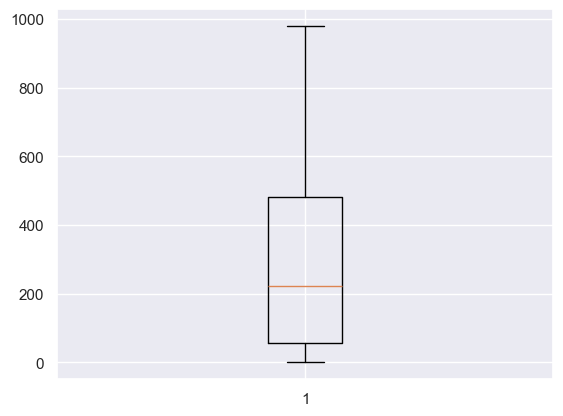

In [40]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [41]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-587.0, 1125.0)

In [42]:
df.block = df.block.clip(lower_bound , upper_bound)

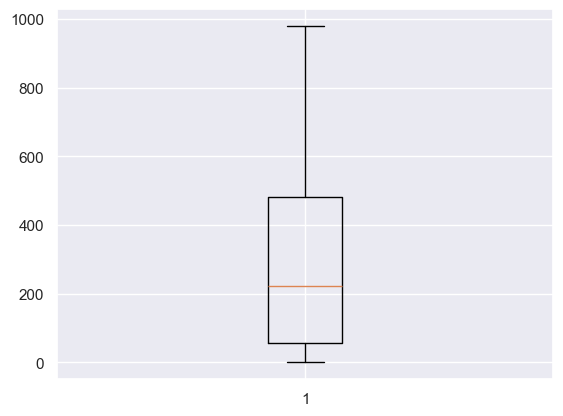

In [43]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

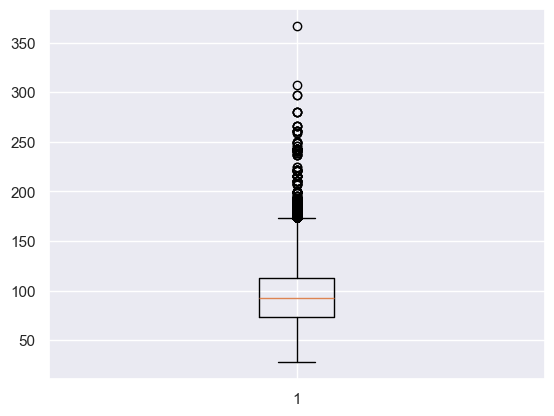

In [44]:
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [45]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [46]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

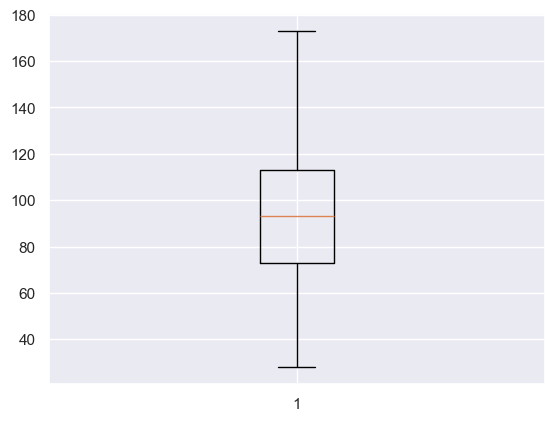

In [47]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

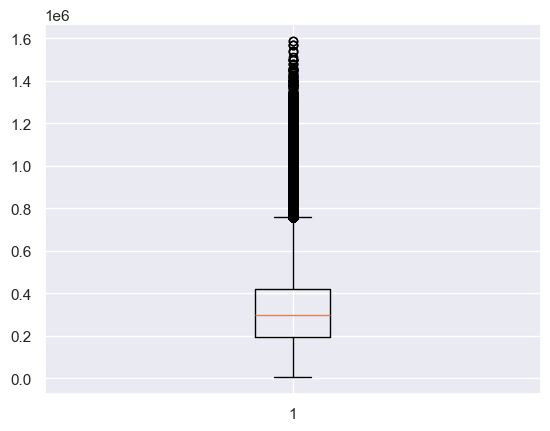

In [48]:
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [49]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-143750.0, 758250.0)

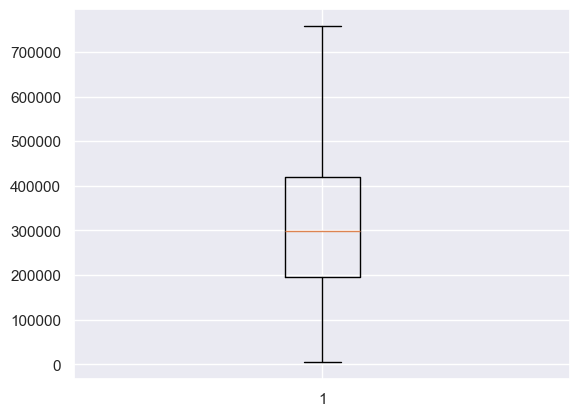

In [50]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

plt.boxplot(df['resale_price'] )

# show plot
plt.show()

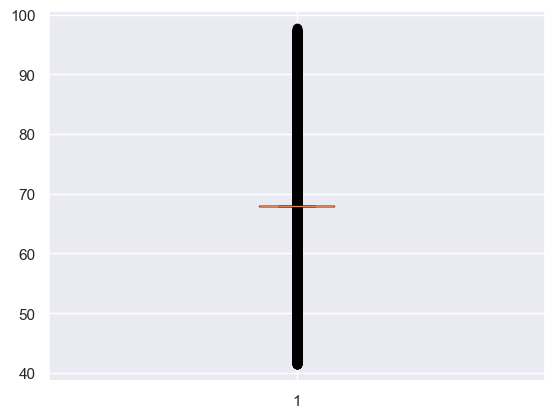

In [51]:
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [52]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

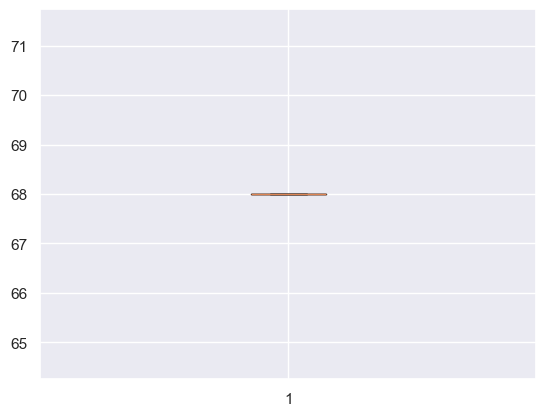

In [53]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

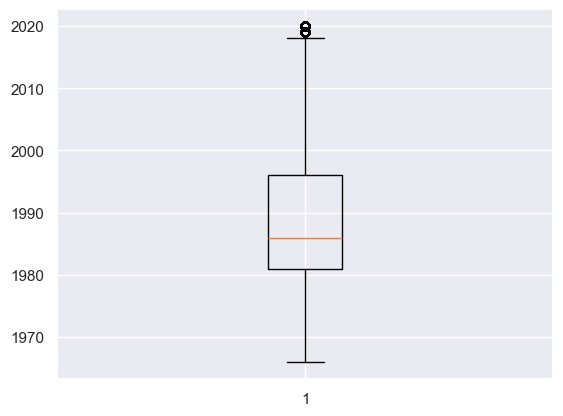

In [54]:
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [55]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

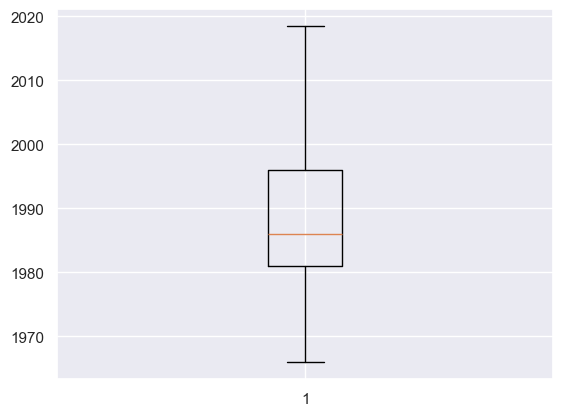

In [56]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

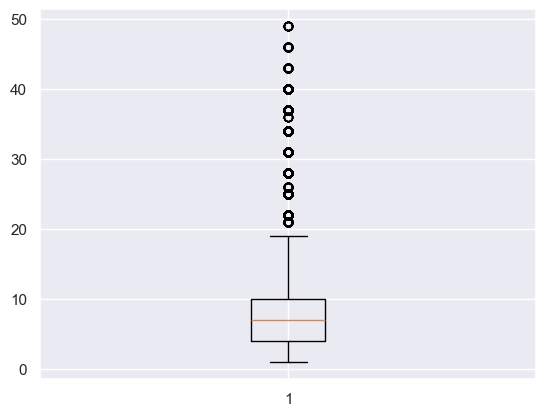

In [57]:
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [58]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

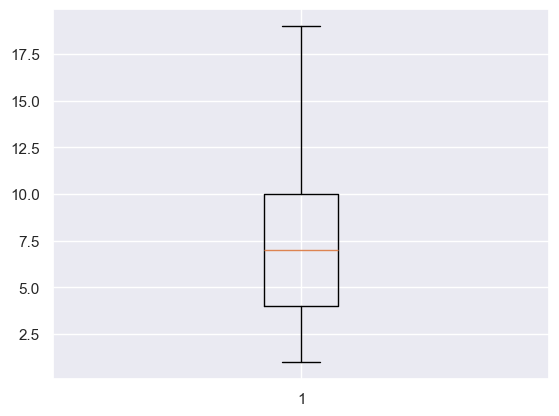

In [59]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

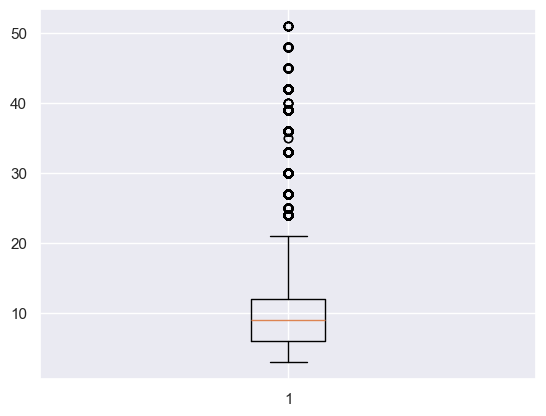

In [60]:
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [61]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

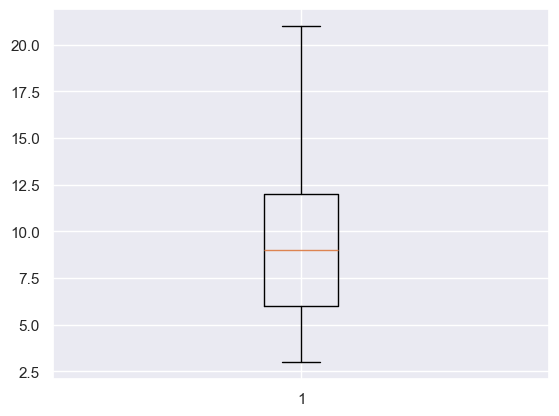

In [62]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS
Categorical Vs Frequency using BarPlot

In [63]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

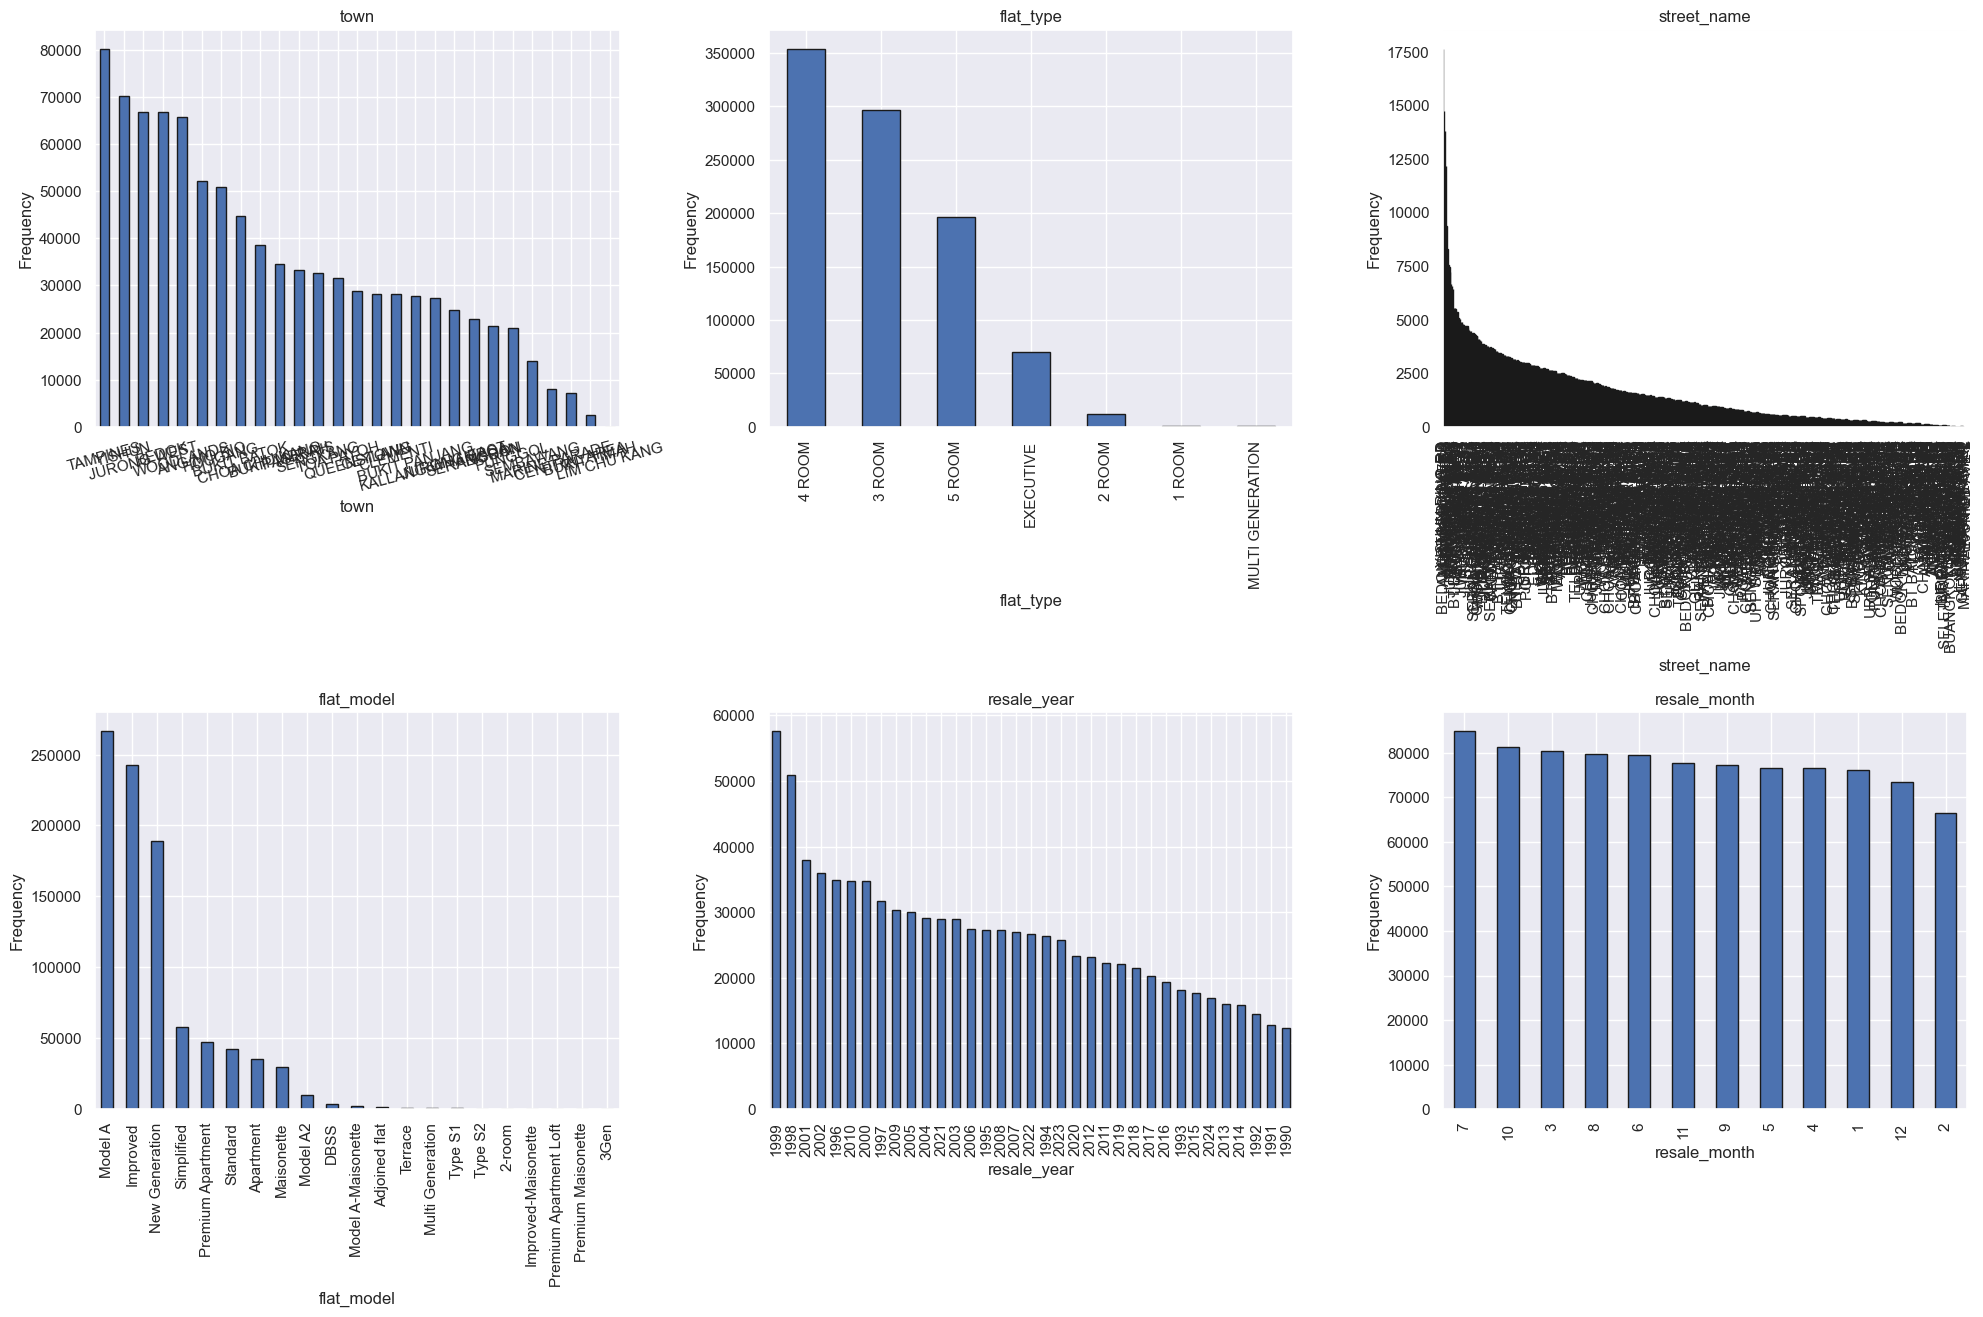

In [64]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Feature Vs Target (Categorical Data )

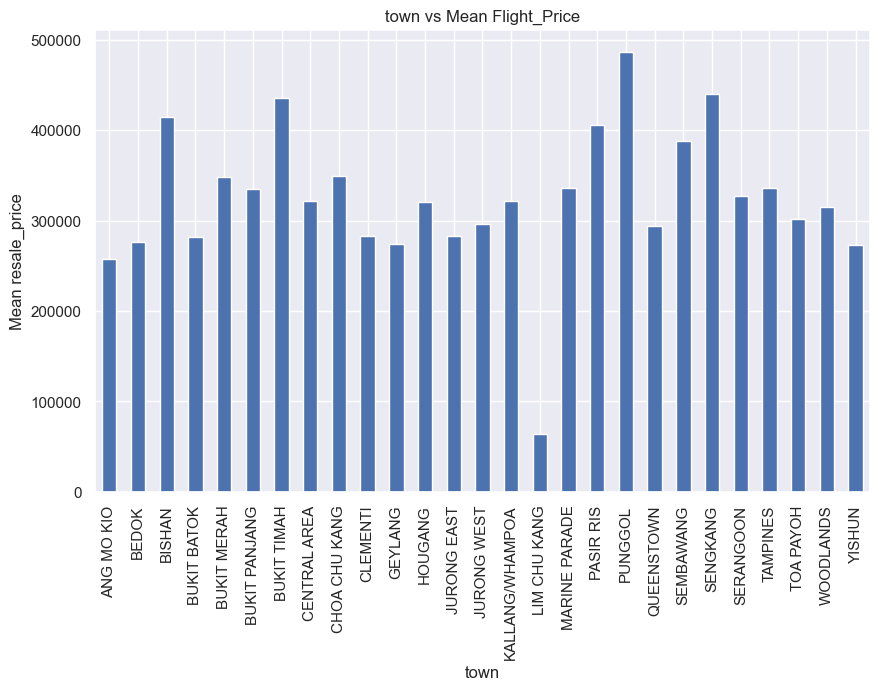

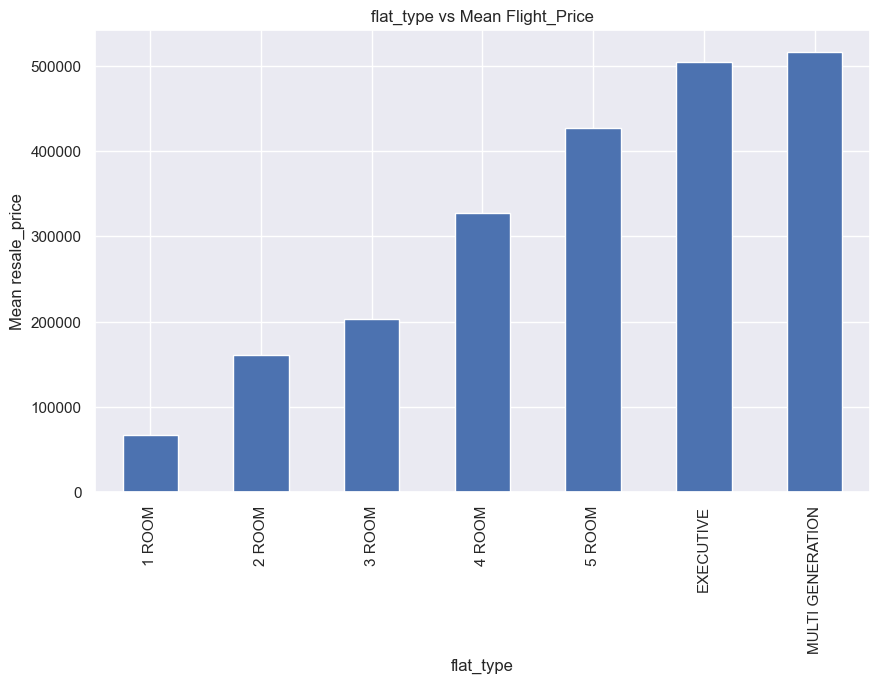

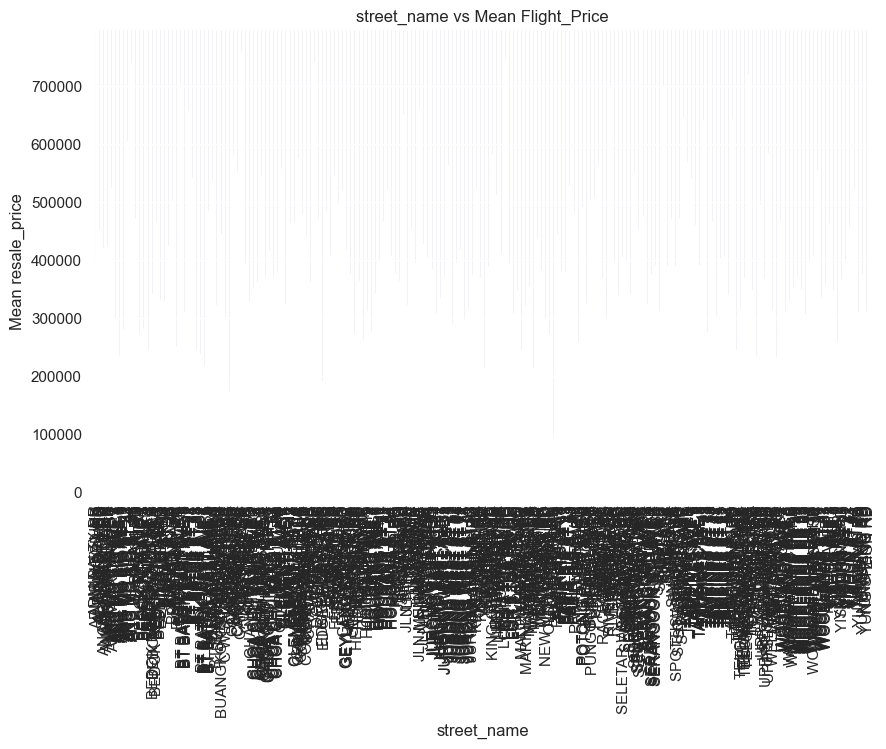

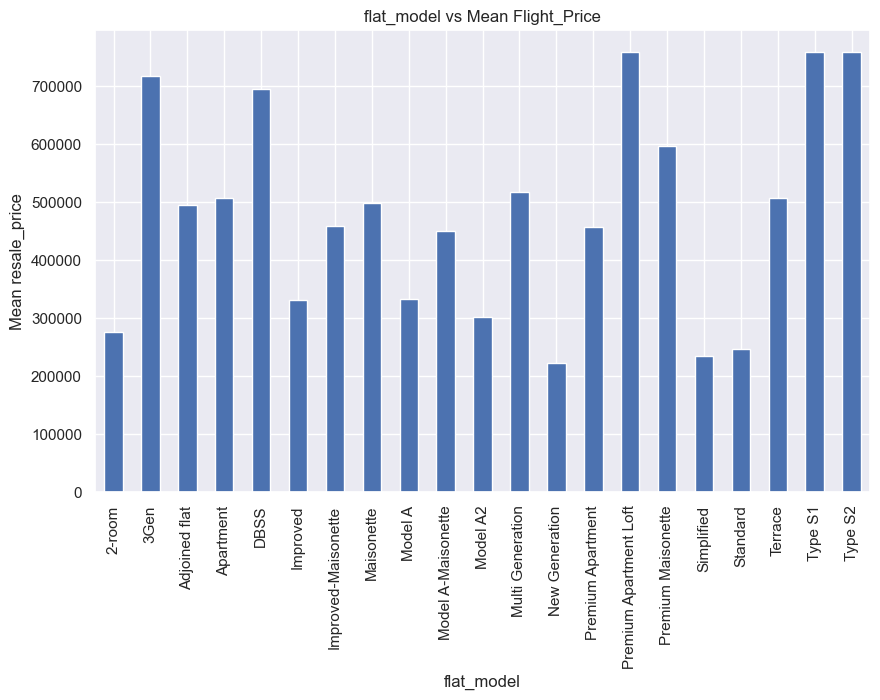

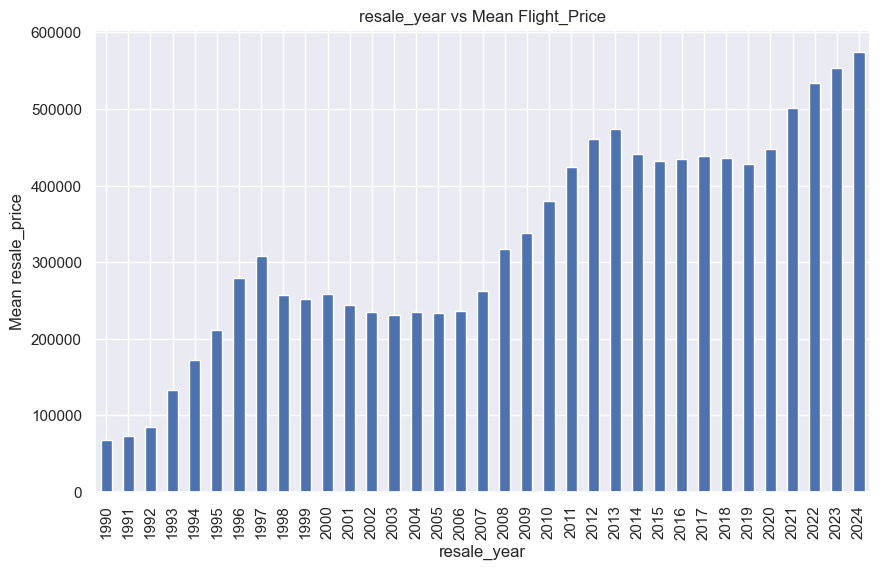

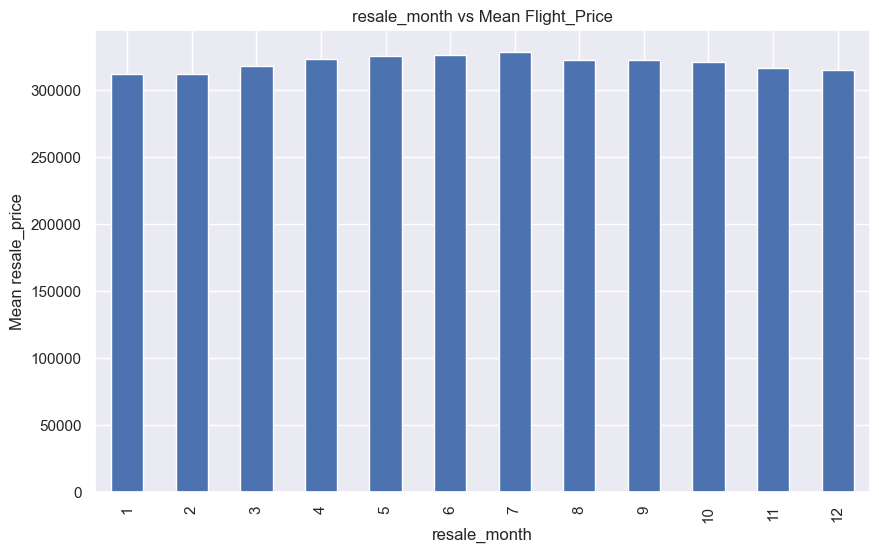

In [65]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

Feature Vs Target (Continous Data )

In [66]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [67]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

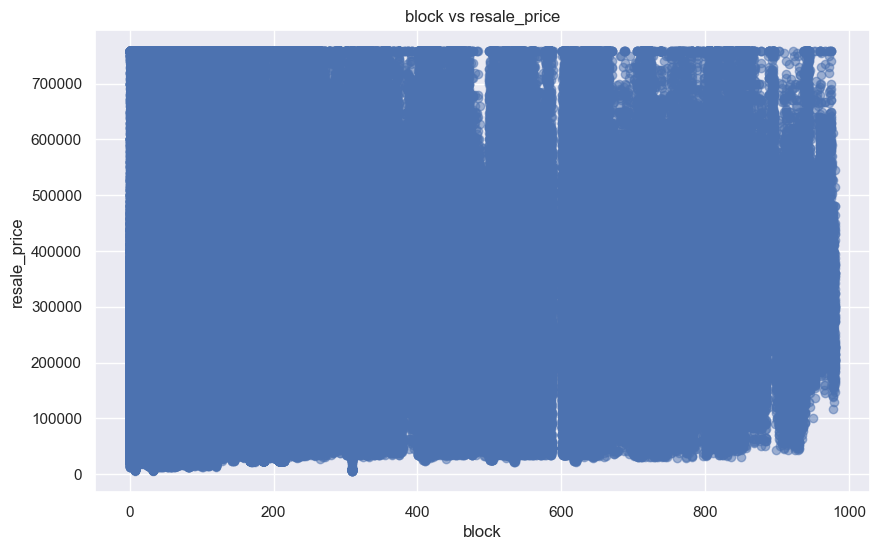

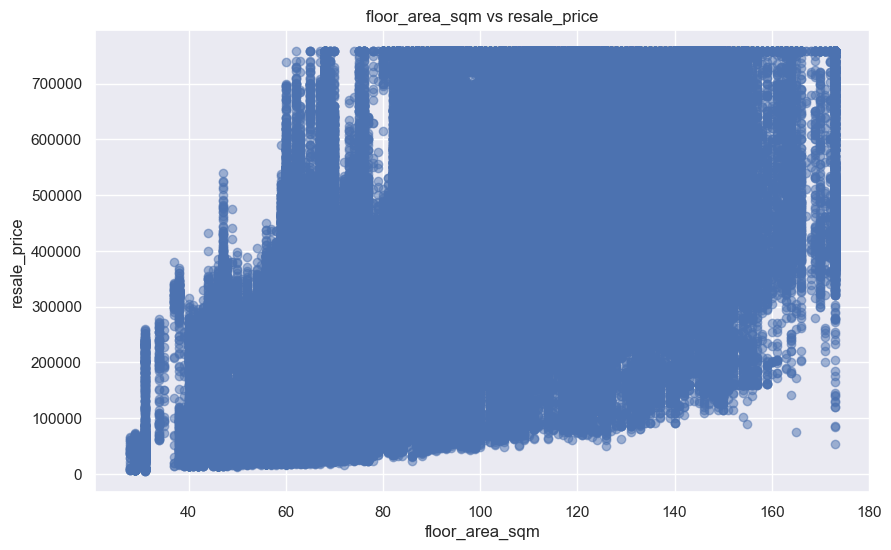

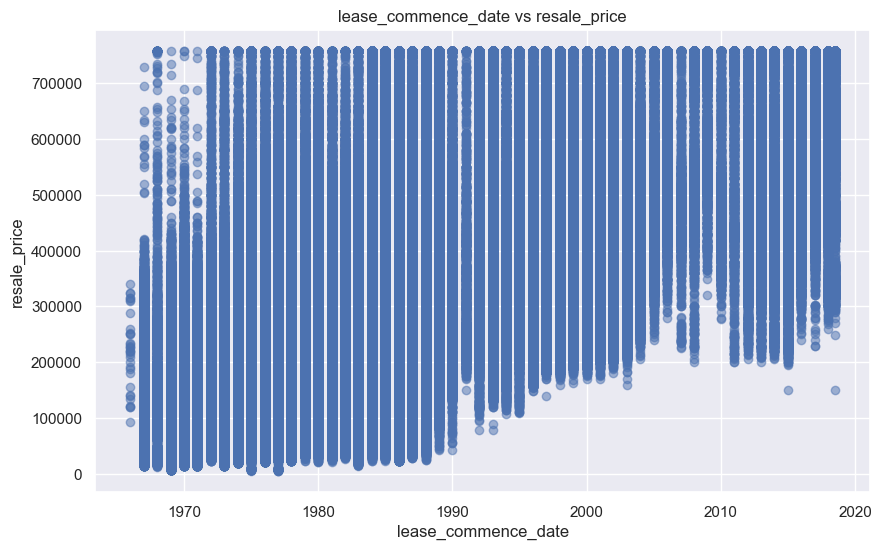

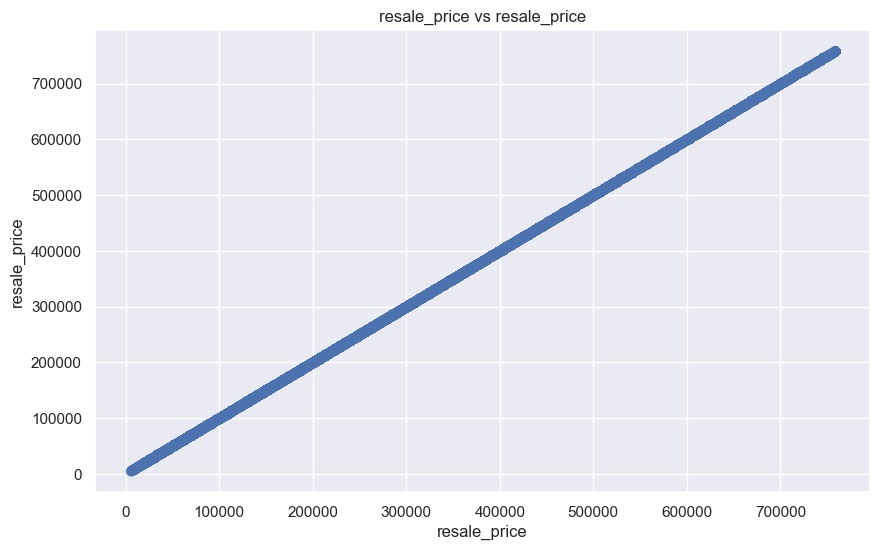

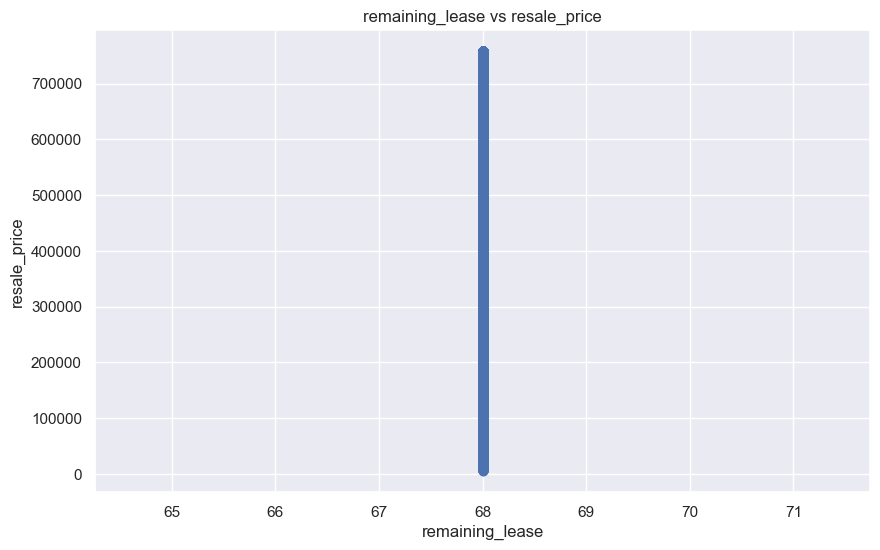

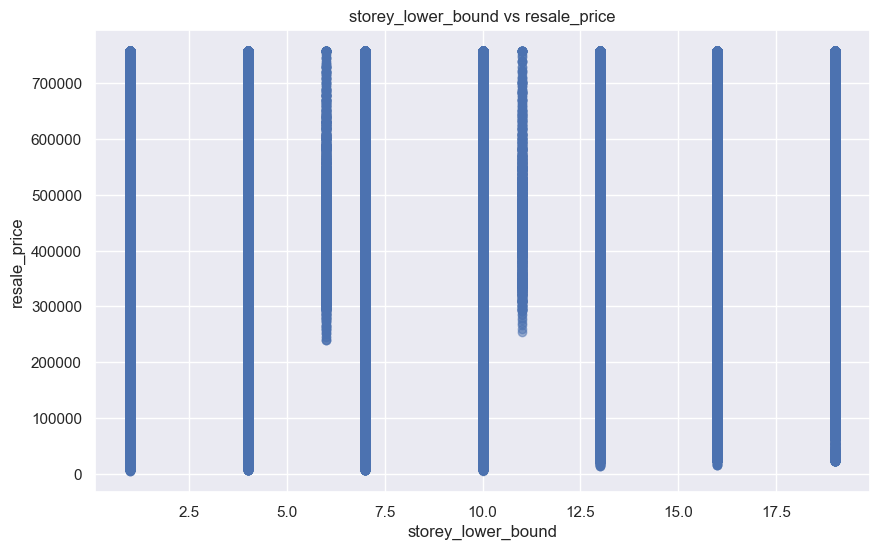

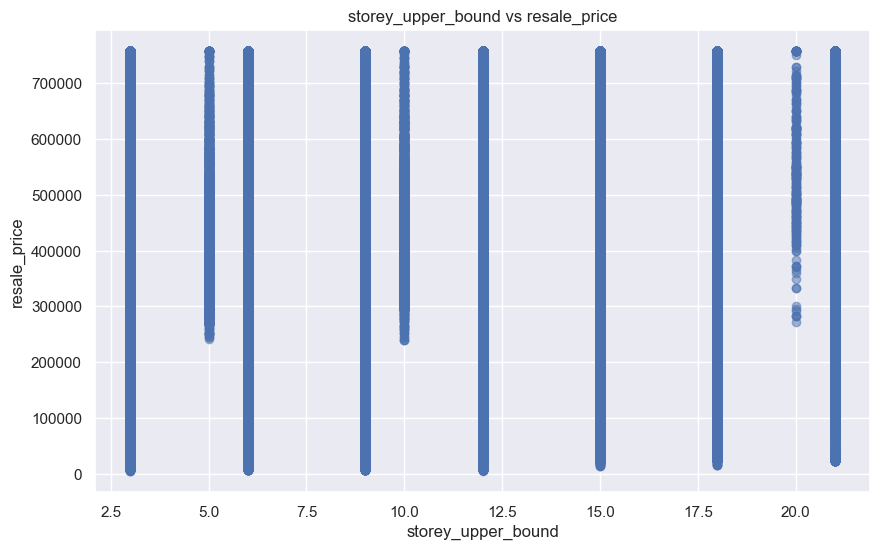

In [68]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

Encoding Categorical Variables

In [69]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [70]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [71]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [72]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [73]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [74]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [75]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [76]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [77]:
# save the processed data for the deployment
df1.to_csv('singapore_final.csv')

Correlation

In [78]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208115,0.049763,0.586815,0.200859,0.163867,0.332556,0.123231,NaN,0.123829,0.003935,-0.018949,-0.018689
flat_type,0.208115,1.000000,0.127803,0.385839,0.954851,0.241863,0.405696,0.596827,NaN,0.100147,0.003379,0.077201,0.077531
block,0.049763,0.127803,1.000000,0.044796,0.187903,-0.003816,-0.000206,-0.085182,NaN,-0.118195,0.002171,-0.125300,-0.125332
street_name,0.586815,0.385839,0.044796,1.000000,0.354608,0.354304,0.736700,0.379145,NaN,0.317497,0.006224,0.082233,0.082860
floor_area_sqm,0.200859,0.954851,0.187903,0.354608,1.000000,0.199847,0.383410,0.571058,NaN,0.061770,0.002819,0.043414,0.043602
flat_model,0.163867,0.241863,-0.003816,0.354304,0.199847,1.000000,0.354993,0.245561,NaN,0.162228,0.001569,0.020419,0.020772
lease_commence_date,0.332556,0.405696,-0.000206,0.736700,0.383410,0.354993,1.000000,0.545166,NaN,0.432729,0.003559,0.155154,0.155538
resale_price,0.123231,0.596827,-0.085182,0.379145,0.571058,0.245561,0.545166,1.000000,NaN,0.686656,0.005349,0.210520,0.213123
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123829,0.100147,-0.118195,0.317497,0.061770,0.162228,0.432729,0.686656,NaN,1.000000,-0.025358,0.097164,0.099155


HeatMap

<Axes: >

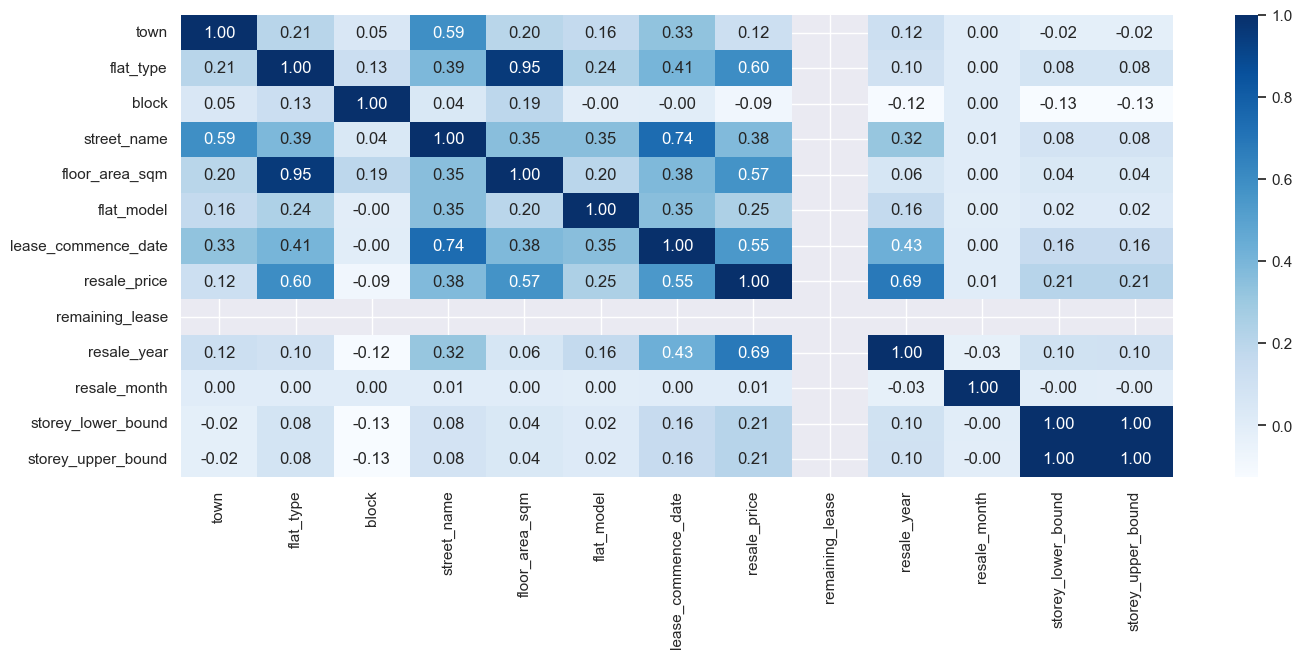

In [79]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

Machine Learning

In [80]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [81]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(744016, 12) (186005, 12) (744016,) (186005,)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.68374433, -1.07061168,  2.24049683, ...,  0.42625942,
          0.09220103,  0.08899867],
        [ 1.45299535, -0.01587319, -0.62623143, ...,  0.13254436,
          0.09220103,  0.08899867],
        [ 0.81195284, -1.07061168, -0.71760126, ..., -1.33603092,
          0.09220103,  0.08899867],
        ...,
        [ 1.45299535,  1.0388653 , -0.18841769, ..., -0.1611707 ,
          1.43897478,  1.43600643],
        [ 0.29911882, -0.01587319, -0.7594791 , ...,  0.42625942,
          1.43897478,  1.43600643],
        [-1.23938321, -0.01587319,  0.44736401, ...,  0.71997447,
         -0.58118584, -0.58450521]]),
 array([[ 1.06836984,  1.0388653 ,  2.10724916, ..., -1.04231587,
         -0.58118584, -0.58450521],
        [ 0.29911882, -1.07061168, -0.78232155, ...,  0.71997447,
         -0.58118584, -0.58450521],
        [-1.49580022,  1.0388653 , -0.86227015, ...,  1.60111964,
          2.78574853,  2.78301419],
        ...,
        [ 0.42732733,  1.0388653 , -1.10592302, ..., -

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regressor

In [84]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[389513.68003706 409129.35041093 567174.4360793  ... 586561.75380451
 645871.28625131 213206.76598348]
491048    273888.0
854425    510000.0
707893    700000.0
659210    307000.0
811114    345000.0
            ...   
148678    203000.0
690838    435000.0
917260    700000.0
859849    758250.0
161980    322000.0
Name: resale_price, Length: 186005, dtype: float64


In [85]:
linear_model.score(X_test, y_test)

0.7943792950501252

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7929649734736663

K Nearest Neighbor Regression

In [87]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29062.349679417213
Mean Squared Error (MSE)     : 1790543590.1790888
Root Mean Square Error (RMSE): 42314.81525635069
R-squared (R2) Score         : 0.9336986739646851


Decision Tree Regressor

In [88]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17477.966406237345
Mean Squared Error (MSE)     : 674333360.7113715
Root Mean Square Error (RMSE): 25967.929465234065
R-squared (R2) Score         : 0.9750303783441863


Random Forest Regressor

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13901.324075614313
Mean Squared Error (MSE)     : 403807262.34096277
Root Mean Square Error (RMSE): 20094.95614180242
R-squared (R2) Score         : 0.9850475815820724


XGBoost regressor

In [91]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16981.395900283318
Mean Squared Error (MSE)     : 562315778.9827402
Root Mean Square Error (RMSE): 23713.198413177844
R-squared (R2) Score         : 0.9791782327994552


Finalizing Model

In [92]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9336986739646851
DecisionTreeRegressor 0.9750303783441863
RandomForestRegressor 0.9850475815820724
XGBRegressor 0.9791782327994552

Model: RandomForestRegressor contain Maximum R2_Score: 0.9850475815820724 


Save the model

In [93]:
model=rf_regressor.fit(X_train, y_train)

In [98]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/singapore_final.csv")
df

,Unnamed: 0,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9
4,4,1,3,216.0,1,73.0,15,1976.0,47200.0,68.0,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930016,932367,22,4,2.0,584,93.0,16,2018.5,580000.0,68.0,2024,8,7,9
930017,932368,22,4,2.0,288,91.0,15,1992.0,485000.0,68.0,2024,8,1,3
930018,932369,22,4,762.0,221,84.0,19,1985.0,488000.0,68.0,2024,8,10,12
930019,932370,22,5,658.0,259,121.0,14,1987.0,630000.0,68.0,2024,8,1,3


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9
4,1,3,216.0,1,73.0,15,1976.0,47200.0,68.0,1990,1,4,6
